# Single Family Properties

## Goal:
    * Discover drivers of property values
    * Use drivers to develop a machine learning model to classify home owners and predict the value of their homes

# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import statistics
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
import wrangle as w
from scipy import stats
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(123)

# Aquire
    * Data aquired from Zillow SQL database
    * It contained 2985217 rows and 59 columns before cleaning
    * Each row represents a home owner
    * Each column represents a feature of the property

# Prepare
##### Prepare Actions:
    * Removed columns that did not contain useful information
    * Rename columns to promote readability
    * Checked for null in the data
    * Checked that colmn data types were appropriate
    * Removed white space from values in object columns
    * Encoded categorical variables
    * Split data into train, validate, and test
    * Scaled continous variables
    * Outliers have been removed from this iteration  of the project

# Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|bedrooms|  Number of bedrooms in home |
|bathrooms|  Number of bathrooms in home including fractional bathrooms |
|fips|  Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details |
|taxamount|  The total property tax assessed for that assessment year |
|year_built|  The Year the principal residence was built |
|square_feet|Calculated total finished living area of the home |
|property_value|  The total tax assessed value of the parcel |

In [2]:
# aquiring data and looking at the data
df = w.wrangle_zillow()
df.head()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


###### Note that since taxamount is a percentage of the property_value it cannot be used to determine property value since it is not a driver of it but is dependant on it

In [3]:
# splitting data into train, validate, and test
train, validate, test = w.split_zillow(df)

### A brief look at the data

In [4]:
train.head()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
753133,3,3,2609,616885,2001,6696,6111
38951,4,5,5030,1573637,1997,17709,6037
1250207,3,1,1015,45510,1944,598,6037
1994915,2,2,1347,228525,1947,2813,6037
1718067,4,4,3177,1238624,1960,13996,6037


### A summery of the data

In [5]:
train.describe()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
count,1.198509e+06,1.198509e+06,1.198509e+06,1.198509e+06,1.198509e+06,1.198509e+06,1.198509e+06
mean,3.301475e+00,2.186956e+00,1.862337e+03,4.596988e+05,1.960970e+03,5.605335e+03,6.048324e+03
std,9.314530e-01,9.720801e-01,9.660099e+02,6.442067e+05,2.215232e+01,7.405107e+03,2.036291e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.801000e+03,1.300000e+01,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.258000e+03,1.892700e+05,1.949000e+03,2.541000e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.624000e+03,3.286280e+05,1.958000e+03,4.114000e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.346410e+05,1.976000e+03,6.412000e+03,6.059000e+03
max,1.500000e+01,3.200000e+01,6.369200e+04,3.604138e+07,2.016000e+03,3.923850e+05,6.111000e+03


# Explore

## Does the fip determine property value?

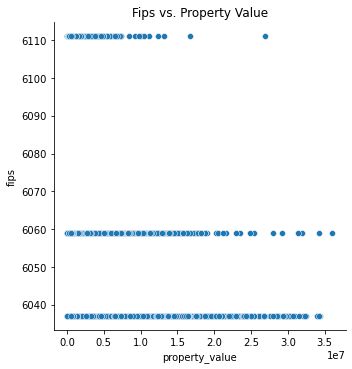

In [6]:
#property at 6035 is more likely to have a higher property value
w.get_fips(train)

##### The lower the fips the greater the property value

##### I will now use a chi-square test to investigate whether 'fips' and 'property_value' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'fips' and 'property_value' are independent of one another
#### Ha: 'fips' and 'property_value' are related

In [7]:
w.get_chi_fips(train)

chi^2 = 1539281.9230
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'fips' and 'property value' are related. Based on this I believe that using the 'fips' feature in modeling will likely have a positive impact on the model's accuracy.

## Does Square Feet determine Property Value?

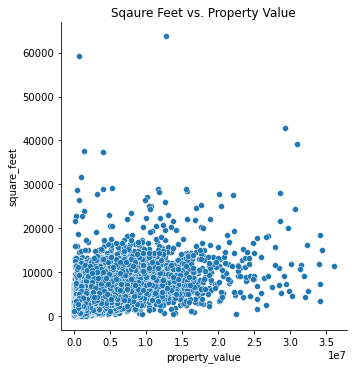

In [8]:
# the higher the square feet the higher the property value
w.get_square_feet(train)

##### There appears to be a correlation between square feet and property value

## Does Year Built determine Property Value?

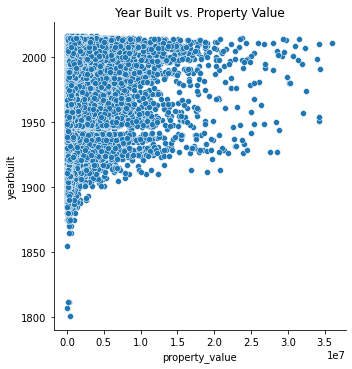

In [4]:
# the newer the house the higher the property value
w.get_year_built(train)

##### The earlier a house is built the more it is worth

##### I will now use a chi-square test to investigate whether 'year built' and 'property value' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'year built' and 'property value' are independent of one another
#### Ha: 'year built' and 'property value' are related

In [27]:
w.get_chi_year_built(train)

chi^2 = 69980603.1074
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'yearbuilt' and 'property value' are related. Based on this I believe that using the 'yearbuilt' feature in modeling will likely have a positive impact on the model's accuracy.

## Does number of basthrooms determine property value?

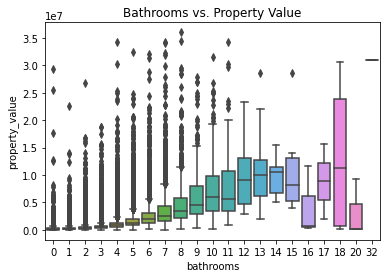

In [5]:
# the more bathrooms the higher the property value
w.get_bathrooms(train)

##### The more bathrooms a house has the more it is worth

##### I will now use a chi-square test to investigate whether 'bathrooms' and 'property value' are related
    * I will use a confidence interval of 95%
    * The resulting alpha is .05

#### H_0: 'bathrooms' and 'property value' are independent of one another
#### Ha: 'bathrooms' and 'property value' are related

In [29]:
w.get_chi_bathrooms(train)

chi^2 = 19846220.9265
p     = 0.0000


##### The p-value is greater than the alpha. Therefore, we have evidence to support that 'bathrooms' and 'property value' are related. Based on this I believe that using the 'bathrooms' feature in modeling will likely have a positive impact on the model's accuracy.

## Does number of bedrooms determine property value?

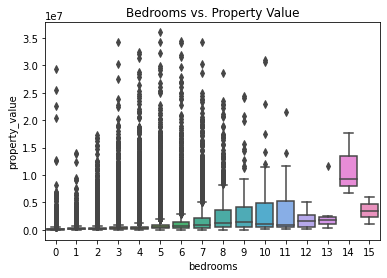

In [6]:
# the more bedrooms the higher the property value
w.get_bedrooms(train)

##### The more bedrooms a house has the more it is worth

# Exploration Summery
    * "fips" was found to be a driver of "property_value"
    * "square_feet" was found to be a driver of "property_value"
    * "year_built" was found to be a driver of "property_value"
    * "bathrooms" was found to be a driver of "property_value"
    * "bedrooms" was found to be a driver of "property_value"

# Features I am moving to modeling with
    * "fips" (There is evidence that fips is a driver of property_value)
    * "year_built" (There is evidence that year_built is a driver of property_value)
    * "bathrooms" (There is evidence that bathrooms is a driver of property_value)
    * "bedrooms" (There is evidence that bedrooms is a driver of property_value)
    * "square_feet" ((There is evidence that square_feet is a driver of property_value)

# Features I am not moving to modeling with
    * The only features I am noy moving forward with is taxamount due to it being a simple percentage of the property value

# Modeling
    * I will use precision precision as evaluation metric
    * I will be evaluating models developed using four different model types and various hyperparameter configurations
    * Models will be evaluated on train and validate data
    * The model that performs the best will then be evaluated on test data

In [4]:
# prep data for modeling
train_X, validate_X, test_X, train_y, validate_y, test_y = w.model_prep(train, validate, test)

In [5]:
# Scale the data
X_train_scaled, X_validate_scaled, X_test_scaled = w.scale_data(train_X, validate_X, test_X)

In [6]:
# get the mean and median of sample
w.get_mean(train_y, validate_y)

RMSE using Mean
Train/In-Sample:  644206.46 
Validate/Out-of-Sample:  646432.11
RMSE using Median
Train/In-Sample:  657405.14 
Validate/Out-of-Sample:  659661.51


In [7]:
# create the metric_df as a blank dataframe
metric_df = pd.DataFrame()
# make our first entry into the metric_df with median baseline
metric_df = w.make_metric_df(train_y.property_value,
                           train_y.property_value_pred_mean,
                           'mean_baseline',
                          metric_df)

In [8]:
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,644206.461786,0.0


###### Baseline for the models to perform against

# Linear Regression

In [9]:
rmse_train, rmse_validate = w.linear_regression(train_X, train_y, validate_X, validate_y)

RMSE for OLS using LinearRegression
Training/In-Sample:  552855.9066957339 
Validation/Out-of-Sample:  550438.7799214133


In [10]:
metric_df = metric_df.append({
    'model': 'OLS Regressor',
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(validate_y.property_value, validate_y.property_value_pred_lm)}, ignore_index=True)

In [11]:
# get linear regression results
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,644206.461786,0.000000
1,OLS Regressor,550438.779921,0.274946


###### Linear Regression performed below the baseline

# LassoLars

In [12]:
rmse_train, rmse_validate = w.lassolars(train_X, train_y, validate_X, validate_y)

RMSE for Lasso + Lars
Training/In-Sample:  552867.5325768891 
Validation/Out-of-Sample:  550470.6609538784


In [13]:
metric_df = w.make_metric_df(validate_y.property_value,
               validate_y.property_value_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [14]:
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,644206.461786,0.000000
1,OLS Regressor,550438.779921,0.274946
2,lasso_alpha_1,550470.660954,0.274862


###### The LassoLars performed about the same as the Linear Regression

# TweedieRegressor

In [15]:
rmse_train, rmse_validate = w.tweedie(train_X, train_y, validate_X, validate_y)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  644206.4617860444 
Validation/Out-of-Sample:  646432.1091968865


In [16]:
metric_df = w.make_metric_df(validate_y.property_value,
               validate_y.property_value_pred_glm,
               'glm_poisson',
               metric_df)

In [17]:
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,644206.461786,0.000000
1,OLS Regressor,550438.779921,0.274946
2,lasso_alpha_1,550470.660954,0.274862
3,glm_poisson,646432.109197,0.000000


###### The Tweedie Regressor performs the closest to the baseline

# Polynomial Regression

In [18]:
rmse_train, rmse_validate = w.polynomial(train_X, train_y, validate_X, validate_y, test_X)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  518695.4255267365 
Validation/Out-of-Sample:  507238.0813583683


In [19]:
metric_df = w.make_metric_df(validate_y.property_value,
               validate_y.property_value_pred_lm2,
               'quadratic',
               metric_df)

In [20]:
metric_df

,model,RMSE_validate,r^2_validate
0,mean_baseline,644206.461786,0.000000
1,OLS Regressor,550438.779921,0.274946
2,lasso_alpha_1,550470.660954,0.274862
3,glm_poisson,646432.109197,0.000000
4,quadratic,507238.081358,0.384289


###### Polynomial Regression performs the worst out of the models

# Comparing Models

In [21]:
metric_df[['model', 'RMSE_validate']]

,model,RMSE_validate
0,mean_baseline,644206.461786
1,OLS Regressor,550438.779921
2,lasso_alpha_1,550470.660954
3,glm_poisson,646432.109197
4,quadratic,507238.081358


###### Polynomial performs the worst out of all the models while Tweedie performs the best

###### Summary
    * Of the models Polynomial Regression performed the worst so it shall be disqualified
    * Linear Regression and Lasso Lars performed about the same but did not meet the baseline and will be disqualified
    * I have chosen to move forward with the TweedieRegressor model because it was closest to the baseline out of all the models

# TweedieRegressor on Test

In [22]:
w.tweedie_on_test(train_X, test_X, train_y, test_y)

RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  646918.1783403155


## Modeling Summary
    * Linear Regression, Polynomial Regression, and LassoLars performed below the expected results and will not be used for the test. Polynomial Regression performed the worst out of all of them
    * The model that was chosen for test was TweedieRegressor due to it being the most precise to the baseline
    * final model performed very close to the baseline 

# Conclusions

## Exploration
    * Homes with many bathrooms have a higher property value
    * Homes with many bedrooms have a higher property value
    * Homes with high square feet have a higher property value
    * A homes property value can be better determined by the fip it is located in
    * A homes property value can be better determined by the year it was built with those built earlier having a higher value

## Modeling 
###### The final model performed very close to the baseline
    * Linear Regression, LassoLars, and Polynomial Regression performed well below the baseline
    * TweedieRegressor performed slightly higher than the baseline but is the closest and was used for the test
    * A TweedieRegressor model selected as the final model and had an precision of 646,000

## Recommendations 
    * To better predict what a properties value is filtering by bathroom and bedroom numbers, year built, and the fips to better predict the value

## Next Steps
    * getting homes from different fips would allow us to study how home area afffects the property value
    * Research features about the home area that could lower or increase the property value such as crime rate, schooling, or distnace from entertainment districts